## Import Library

In [2]:
import sys
print(sys.version)

3.9.15 (main, Oct 11 2022, 21:39:54) 
[Clang 14.0.0 (clang-1400.0.29.102)]


In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams 
from sklearn.linear_model import LinearRegression

## Dataset

In [2]:
# read the excel file into a pandas dataframe
df = pd.read_csv("Data_electricityConsumption_weather_4.csv")
# print the contents of the dataframe
df.head(10)

,time,temperature,humidity,wind_speed,rain_rate,electricity_consumption
0,2017-01-01 00:00:00+01:00,6.0,88,2,0.0,24635
1,2017-01-01 01:00:00+01:00,6.0,95,1,0.0,23627
2,2017-01-01 02:00:00+01:00,6.0,88,2,0.0,22143
3,2017-01-01 03:00:00+01:00,4.0,95,2,0.0,20849
4,2017-01-01 04:00:00+01:00,5.0,95,2,0.0,19862
5,2017-01-01 05:00:00+01:00,4.0,95,3,0.0,19486
6,2017-01-01 06:00:00+01:00,3.0,95,1,0.0,19585
7,2017-01-01 07:00:00+01:00,3.0,95,1,0.0,19925
8,2017-01-01 08:00:00+01:00,3.0,95,2,0.0,19834
9,2017-01-01 09:00:00+01:00,3.0,95,2,0.0,20472


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time                     17520 non-null  object 
 1   temperature              17520 non-null  float64
 2   humidity                 17520 non-null  int64  
 3   wind_speed               17520 non-null  int64  
 4   rain_rate                17520 non-null  float64
 5   electricity_consumption  17520 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 821.4+ KB


In [7]:
# separate the features (temperature, humidity, wind speed, and rain rate) and target variable (electricity consumption)
X = df[:,:-1]d
y = df[:, -1]

# calculate thedd correlation using r2_score
correlation = r2_score(y, X, multioutput='uniform_average')

print('Correlation between weather components and electricity consumption:', correlation)

InvalidIndexError: (slice(None, None, None), slice(None, -1, None))

#### Change data type to float64

In [4]:
df = df.astype({'humidity':'float','wind_speed':'float','electricity_consumption':'float'})
df = df.drop(['time'],axis=1)

In [5]:
df.describe()

,temperature,humidity,wind_speed,rain_rate,electricity_consumption
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,18.175847,59.611644,3.800342,0.000004,29187.783790
std,7.327785,19.297168,2.429150,0.000521,4613.907909
min,-1.662000,3.000000,1.000000,0.000000,234.000000
25%,13.000000,46.000000,2.000000,0.000000,25272.750000
50%,18.000000,61.000000,3.000000,0.000000,29351.500000
75%,24.000000,76.000000,5.000000,0.000000,32767.000000
max,38.000000,95.000000,134.000000,0.069000,41249.000000


In [6]:
df['temperature']=df['temperature'].fillna(value=df['temperature'].mean())
df['humidity']=df['humidity'].fillna(value=df['humidity'].mean())
df['wind_speed']=df['wind_speed'].fillna(value=df['wind_speed'].mean())
df['rain_rate']=df['rain_rate'].fillna(value=df['rain_rate'].mean())
df['electricity_consumption']=df['electricity_consumption'].fillna(value=df['electricity_consumption'].mean())

In [11]:
df.head()

,temperature,humidity,wind_speed,rain_rate,electricity_consumption
0,6.0,88.0,2.0,0.0,24635.0
1,6.0,95.0,1.0,0.0,23627.0
2,6.0,88.0,2.0,0.0,22143.0
3,4.0,95.0,2.0,0.0,20849.0
4,5.0,95.0,2.0,0.0,19862.0


## Correlation Coefficient

Hitunglah korelasi antara komponen cuaca yaitu temperature, humidity, wind speed, dan rain rate,
terhadap electricity consumption.
Note: gunakan R2 (Correlation Coefficient) untuk menghitung nilai correlation.

In [7]:
# Split the dataset into features and target variable
X = df[['temperature', 'humidity', 'wind_speed', 'rain_rate']]
y = df['electricity_consumption']

# Compute the correlation between the features and the target variable
correlation = X.corrwith(y)

# Extract the correlation coefficient between each feature and the target variable
temp_corr = correlation['temperature']
humid_corr = correlation['humidity']
wind_corr = correlation['wind_speed']
rain_corr = correlation['rain_rate']

# Compute the R-squared value for each feature
temp_r2 = r2_score(y, X['temperature'])
humid_r2 = r2_score(y, X['humidity'])
wind_r2 = r2_score(y, X['wind_speed'])
rain_r2 = r2_score(y, X['rain_rate'])

# Print the results
print('Correlation coefficients:')
print(f'Temperature: {temp_corr:.2f}')
print(f'Humidity: {humid_corr:.2f}')
print(f'Wind speed: {wind_corr:.2f}')
print(f'Rain rate: {rain_corr:.2f}\n')

print('R-squared values:')
print(f'Temperature: {temp_r2:.2f}')
print(f'Humidity: {humid_r2:.2f}')
print(f'Wind speed: {wind_r2:.2f}')
print(f'Rain rate: {rain_r2:.2f}')


Correlation coefficients:
Temperature: -0.03
Humidity: 0.02
Wind speed: 0.01
Rain rate: -0.01

R-squared values:
Temperature: -39.97
Humidity: -39.86
Wind speed: -40.01
Rain rate: -40.02


In [8]:
corr_df = df.corr()
corr_df

,temperature,humidity,wind_speed,rain_rate,electricity_consumption
temperature,1.000000,-0.370981,0.097637,0.005857,-0.032425
humidity,-0.370981,1.000000,-0.407153,0.004850,0.019451
wind_speed,0.097637,-0.407153,1.000000,-0.005600,0.014906
rain_rate,0.005857,0.004850,-0.005600,1.000000,-0.005462
electricity_consumption,-0.032425,0.019451,0.014906,-0.005462,1.000000


<AxesSubplot:>

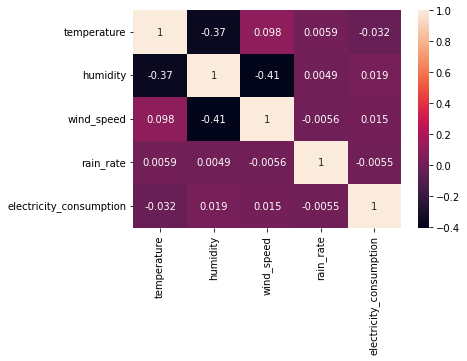

In [9]:
correlation_matrix = corr_df
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

### Modelling and R-squared Score

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

from sklearn.linear_model import LinearRegression
Linear_model= LinearRegression()
Linear_model.fit(X_train,y_train)
predictions1=Linear_model.predict(X_test)

In [21]:
corr_df = df.corr()
corr_df

,temperature,humidity,wind_speed,rain_rate,electricity_consumption
temperature,1.000000,-0.370981,0.097637,0.005857,-0.032425
humidity,-0.370981,1.000000,-0.407153,0.004850,0.019451
wind_speed,0.097637,-0.407153,1.000000,-0.005600,0.014906
rain_rate,0.005857,0.004850,-0.005600,1.000000,-0.005462
electricity_consumption,-0.032425,0.019451,0.014906,-0.005462,1.000000


In [11]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,predictions1)**(0.5))

4627.028942301675


In [12]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions1)

0.000555876018791146

## Linear Regression Model

Bangunlah model regresi linear antara komponen cuaca yang mempunyai correlation coefficient TERTINGGI (jika dibandingkan dengan electricity consumption) dengan electricity consumption dengan menggunakan Least Square Method ATAU Gradient Descent (lihat pertemuan 2, 3 dan 4).

a. Visualisasikan data antara komponen cuaca terhadap electricty consumption dalam bentuk Scatter plot

b. Visualisasikan hasil model regresi untuk poin (a) berupa garis linear dan tuliskan hasil model regresi (berupa persamaan garis)

c. bahas mengenai keakuratan dari model tsb

In [16]:
#Setting Up
rcParams['figure.figsize']    = (14,7)
rcParams['axes.spines.top']   = False
rcParams['axes.spines.right'] = False

In [18]:
#Rescalling Data
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df[['temperature', 'humidity', 'wind_speed', 'rain_rate','electricity_consumption']] = data_scaler.fit_transform(
    df[['temperature', 'humidity', 'wind_speed', 'rain_rate','electricity_consumption']])
# Set Dependent and Independent Variables
X = df['humidity']
y = df['electricity_consumption']

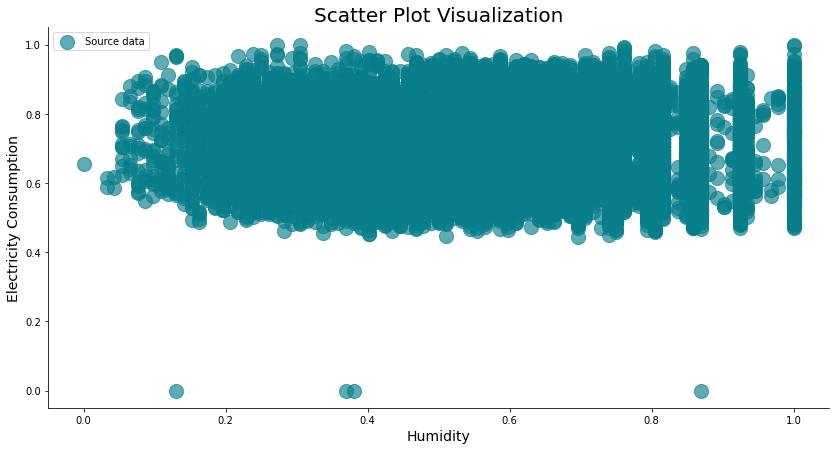

In [37]:
plt.scatter(X,y, s=200, c='#087E8B', alpha=0.65, label='Source data')# plot scatter
plt.title('Scatter Plot Visualization', size=20)
plt.xlabel('Humidity', size=14)
plt.ylabel('Electricity Consumption', size=14)
plt.legend()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
# test = 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### Simple Linear Regression Model

In [26]:
# mendefinisikan SIMPLE LINEAR REGRESSION
class SimpleLinearRegression:
    '''
    A class which implements simple linear regression model
    '''
    def __init__(self):
        self.b0 = None
        self.b1 = None     # b0 dan b1 adalah variabel bebas dari garis yg kita cari

    def fit(self, X, y):   # ini tahapan untuk "training"
        ''' 
        Use calculus to calculate SLOPE and intercept Coefficients: y = b0 + b1x

        :param X: array, single feature
        :param y: array, true values
        :return: None    
        '''
        numerator   = np.sum( (X - np.mean(X))*(y - np.mean(y)) ) # formula pembilang
        denominator = np.sum((X - np.mean(X))**2 )                # formula pembagi
        self.b1     = numerator/denominator                       # lihat expresi ini dipenjelasan web nya
        self.b0     = np.mean(y) - self.b1*np.mean(X)              

    def predict(self, X): # untuk menghitung prediksi nilai y dengan input X
        '''
        Make predictions using the simple line equation
        :param X: array, single feature
        :return: None
        '''
        if not self.b0 or not self.b1:
            raise Exception('Please call `SimpleLinearRegression.fit(X,y)` before making predictions.')
        return self.b0 + self.b1*X

In [27]:
model     = SimpleLinearRegression()    # inialization process
model.fit(X_train, y_train)             # training process, output: coef b0 & b1
preds     = model.predict(X_test)       # prediction process, input: X_test, ouput: y_prediction

In [28]:
preds

6621     0.709371
3394     0.707790
123      0.711096
12074    0.704197
15046    0.710234
           ...   
7205     0.700316
7333     0.708509
15853    0.705347
13199    0.707215
16053    0.710090
Name: humidity, Length: 3504, dtype: float64

In [29]:
y_test

6621     0.707863
3394     0.767939
123      0.570889
12074    0.545264
15046    0.696355
           ...   
7205     0.529952
7333     0.787590
15853    0.753578
13199    0.576131
16053    0.805803
Name: electricity_consumption, Length: 3504, dtype: float64

In [38]:
model.b0, model.b1

(0.6978730277368866, 0.013222842250533773)

#### Visualize the data, by using best fit line

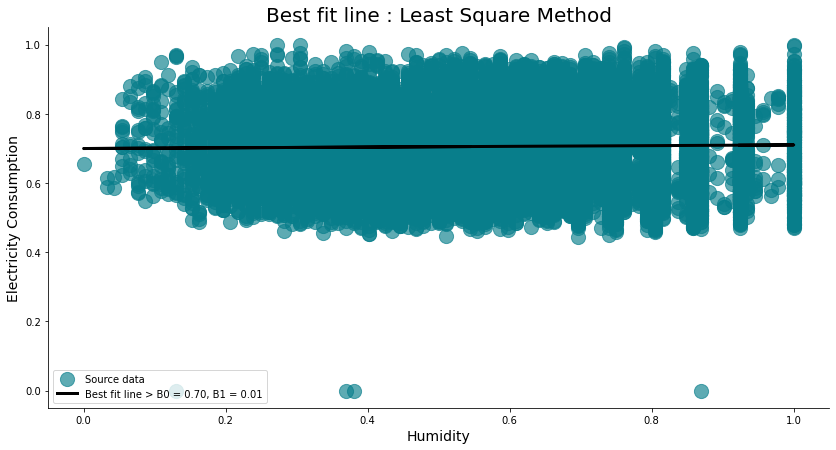

In [30]:
model_all = SimpleLinearRegression()
model_all.fit(X,y)              # bangun kembali model dengan semua data
preds_all = model_all.predict(X)         # membangun model prediksi

plt.scatter(X,y, s=200, c='#087E8B', alpha=0.65, label='Source data')# plot scatter
plt.plot(X, preds_all, color='#000000', lw=3, 
         label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line : Least Square Method', size=20)
plt.xlabel('Humidity', size=14)
plt.ylabel('Electricity Consumption', size=14)
plt.legend()
plt.show()

#### Comparison now we will validate the predicted value with testing data using RMSE

In [31]:
from sklearn.metrics import mean_squared_error  # import rmse from sklearn
rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))  # definisikan y sbg variable?
rmse(y_test, preds)

0.11385078332459779

### Scikit's Learn Regression

In [32]:
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()                               # initialization
sk_model.fit(np.array(X_train).reshape(-1,1), y_train)      # training the model
sk_preds = sk_model.predict(np.array(X_test).reshape(-1,1)) # testing process, input: testing data

sk_model.intercept_, sk_model.coef_     # show the output: b0 and b1 from the prediction

(0.6978730277368872, array([0.01322284]))

In [33]:
# hitung akurasi melalui RMSE untuk hasil dari SCIKIT-LEARN:
rmse(y_test, sk_preds)
# hasil nya hampir sama dengan perhitungan di atas.

0.11385078332459779

In [35]:
# hitung akurasi melalui RMSE untuk hasil dari SVR - SCIKIT-LEARN:
rmse(y_test, svr_lin_preds)

0.11391249871898364

### SVR Model

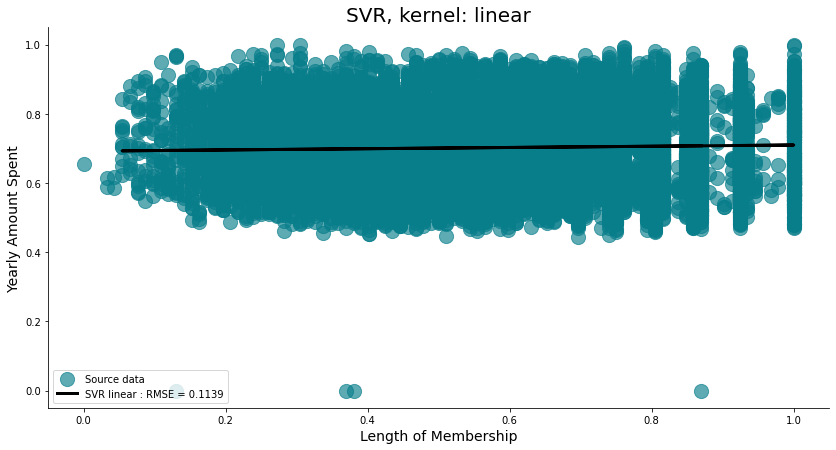

In [34]:
from sklearn.svm import SVR

# now we use linear kernel
svr_lin = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1) # SVR setting
svr_lin.fit(np.array(X_train).reshape(-1,1), y_train)        # training the model
svr_lin_preds = svr_lin.predict(np.array(X_test).reshape(-1,1)) # testing process, input: testing data

# hitung akurasi melalui RMSE untuk hasil dari SVR - SCIKIT-LEARN:
rmse_svrlin = rmse(y_test, svr_lin_preds)

# PLOTTING
plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')   # plot scatter
plt.plot(X_test, svr_lin_preds, color='#000000', lw=3, label=f'SVR linear : RMSE = {rmse_svrlin:.4f}')
plt.title('SVR, kernel: linear', size=20)
plt.xlabel('Length of Membership', size=14)
plt.ylabel('Yearly Amount Spent', size=14)
plt.legend()
plt.show()


In [39]:
# hitung akurasi melalui RMSE untuk hasil dari SVR - SCIKIT-LEARN:
rmse(y_test, svr_lin_preds)

0.11391249871898364